In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('german_credit_data.csv',index_col=0)

In [3]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [5]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [6]:
for col in  df[['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']]:
                print(f"{col}{df[col].value_counts()} values")

Sexmale      690
female    310
Name: Sex, dtype: int64 values
Job2    630
1    200
3    148
0     22
Name: Job, dtype: int64 values
Housingown     713
rent    179
free    108
Name: Housing, dtype: int64 values
Saving accountslittle        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64 values
Checking accountlittle      274
moderate    269
rich         63
Name: Checking account, dtype: int64 values
Purposecar                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
vacation/others         12
domestic appliances     12
Name: Purpose, dtype: int64 values
Riskgood    700
bad     300
Name: Risk, dtype: int64 values


In [7]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [8]:
df.shape

(1000, 10)

In [9]:
df['Job']=df['Job'].map({0:'Unskill and nonres',1:'unskill and res',2:'skilled',3:'highlyskill'})

In [10]:
df1=df

In [11]:
df1.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,skilled,own,NaN,little,1169,6,radio/TV,good
1,22,female,skilled,own,little,moderate,5951,48,radio/TV,bad
2,49,male,unskill and res,own,little,NaN,2096,12,education,good
3,45,male,skilled,free,little,little,7882,42,furniture/equipment,good
4,53,male,skilled,free,little,little,4870,24,car,bad


In [12]:
df1=df[['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']]

# EDA

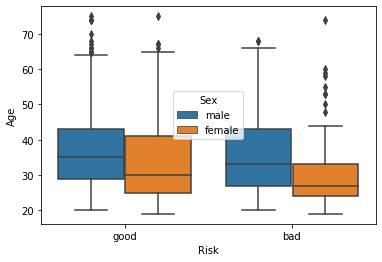

In [13]:
sns.boxplot(df['Risk'],df['Age'],hue=df['Sex'])

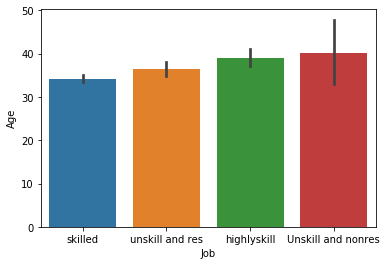

In [14]:
sns.barplot(df['Job'],df['Age'])

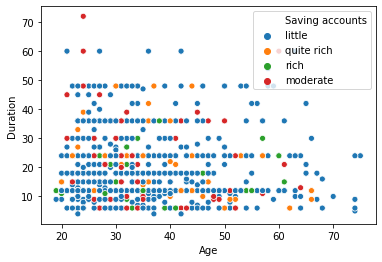

In [15]:
sns.scatterplot(df['Age'],df['Duration'],hue=df['Saving accounts'])

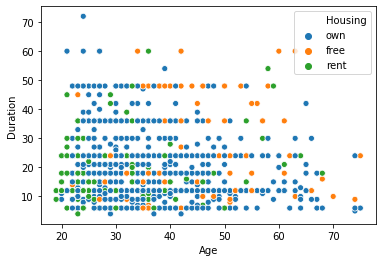

In [16]:
sns.scatterplot(df['Age'],df['Duration'],hue=df['Housing'])

In [17]:
print(df['Duration'].unique())
print(df['Credit amount'].nunique())

[ 6 48 12 42 24 36 30 15  9 10  7 60 18 45 11 27  8 54 20 14 33 21 16  4
 47 13 22 39 28  5 26 72 40]
921


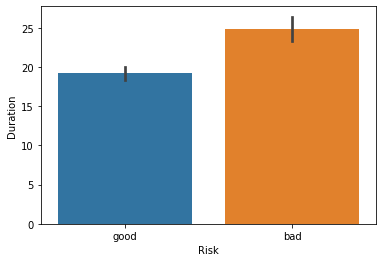

In [18]:
sns.barplot(df['Risk'],df['Duration'])

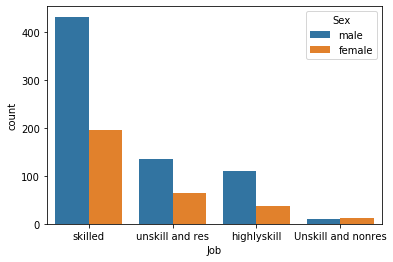

In [19]:
sns.countplot(df['Job'],hue=df['Sex'])

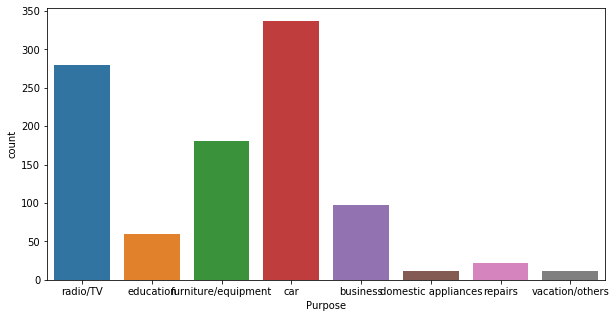

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(df['Purpose'])

In [21]:
df['Purpose'].value_counts()

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
vacation/others         12
domestic appliances     12
Name: Purpose, dtype: int64

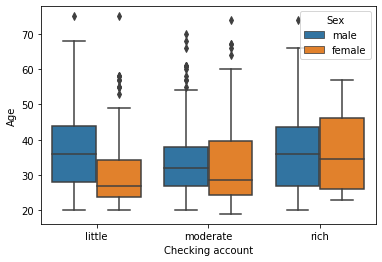

In [22]:
sns.boxplot(df['Checking account'],df['Age'],hue=df['Sex'])

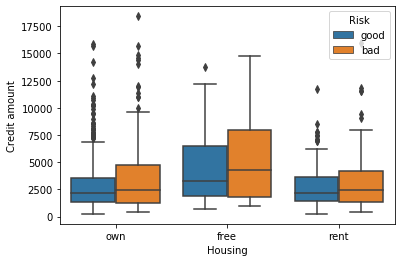

In [23]:
sns.boxplot(df['Housing'],df['Credit amount'],hue=df['Risk'])
## people who got Housing free tend to use

In [24]:
print(df['Saving accounts'].unique())
print(df['Checking account'].unique())

[nan 'little' 'quite rich' 'rich' 'moderate']
['little' 'moderate' nan 'rich']


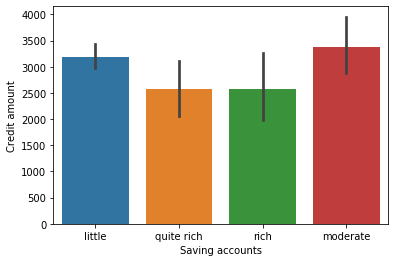

In [25]:
sns.barplot(df['Saving accounts'],df['Credit amount'])


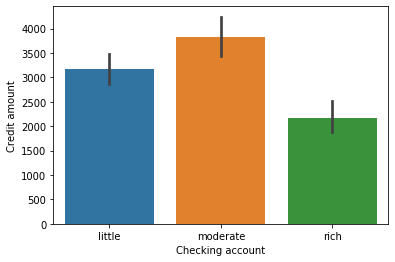

In [26]:
sns.barplot(df['Checking account'],df['Credit amount'])

In [27]:
df.groupby('Saving accounts')['Credit amount'].mean()

Saving accounts
little        3187.832504
moderate      3384.038835
quite rich    2572.111111
rich          2573.395833
Name: Credit amount, dtype: float64

In [28]:
df.groupby('Checking account')['Credit amount'].mean()

Checking account
little      3175.218978
moderate    3827.561338
rich        2177.650794
Name: Credit amount, dtype: float64

In [29]:
df.groupby(['Risk','Checking account'])['Credit amount'].mean()

Risk  Checking account
bad   little              3413.607407
      moderate            4754.752381
      rich                1725.714286
good  little              2943.690647
      moderate            3233.932927
      rich                2306.775510
Name: Credit amount, dtype: float64

In [30]:
df.groupby(['Risk','Saving accounts'])['Credit amount'].mean()##people with more saving accounts tend 
#to use credit cards more why? because money in SA can be withdrawn only 2-3 times in a monthb


Risk  Saving accounts
bad   little             3925.557604
      moderate           4006.970588
      quite rich         3052.818182
      rich               3364.666667
good  little             2773.101036
      moderate           3077.086957
      quite rich         2470.423077
      rich               2460.357143
Name: Credit amount, dtype: float64

In [31]:
df[df['Housing']=='free'].groupby('Purpose')['Credit amount'].mean()

Purpose
business               4931.800000
car                    5834.181818
education              4387.266667
furniture/equipment    4100.181818
radio/TV               2417.333333
repairs                2750.666667
vacation/others        7227.250000
Name: Credit amount, dtype: float64

In [32]:
df[df['Housing']=='own'].groupby('Purpose')['Credit amount'].mean()

Purpose
business               3800.592105
car                    3329.949772
domestic appliances    1546.500000
education              2198.647059
furniture/equipment    3107.459016
radio/TV               2540.493392
repairs                2866.000000
vacation/others        8700.375000
Name: Credit amount, dtype: float64

In [33]:
df[df['Housing']=='rent'].groupby('Purpose')['Credit amount'].mean()## those who have rented house they dont go on vactions

Purpose
business               5614.125000
car                    3487.968254
domestic appliances    1255.500000
education              2931.000000
furniture/equipment    2727.354167
radio/TV               2199.763158
repairs                1522.000000
Name: Credit amount, dtype: float64

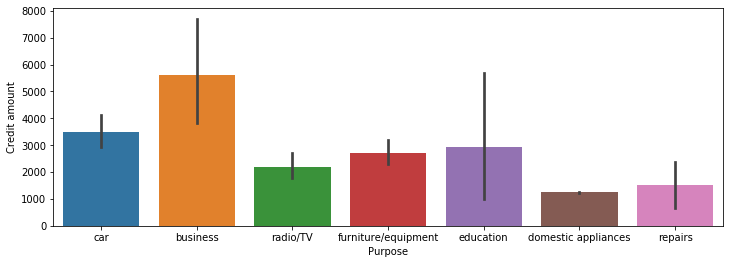

In [34]:
plt.figure(figsize=(12,4))
sns.barplot(df[df['Housing']=='rent']['Purpose'],df[df['Housing']=='rent']['Credit amount'])

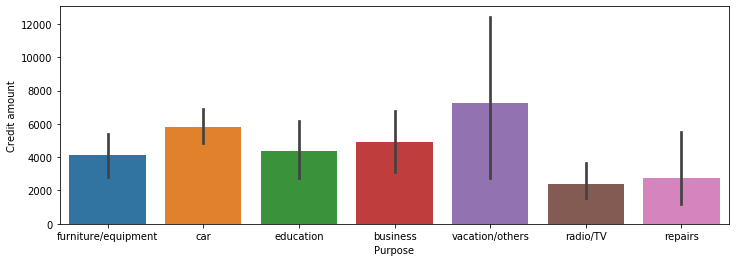

In [35]:
plt.figure(figsize=(12,4))
sns.barplot(df[df['Housing']=='free']['Purpose'],df[df['Housing']=='free']['Credit amount'])

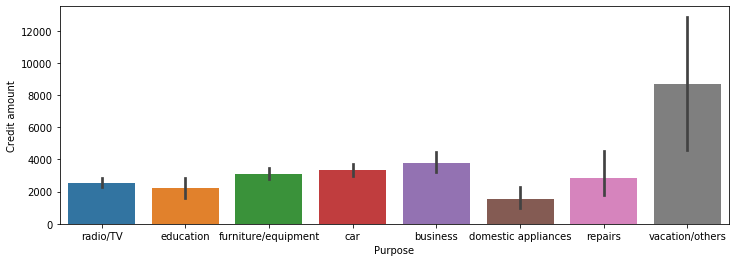

In [36]:
plt.figure(figsize=(12,4))
sns.barplot(df[df['Housing']=='own']['Purpose'],df[df['Housing']=='own']['Credit amount'])

In [37]:
df.groupby(['Sex','Job'])['Credit amount'].mean()

Sex     Job               
female  Unskill and nonres    2065.666667
        highlyskill           5288.729730
        skilled               2644.928934
        unskill and res       2352.937500
male    Unskill and nonres    3560.500000
        highlyskill           5484.414414
        skilled               3264.796767
        unskill and res       2361.147059
Name: Credit amount, dtype: float64

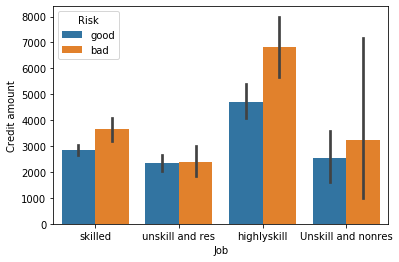

In [38]:
sns.barplot(df['Job'],df['Credit amount'],hue=df['Risk'])##Highly skilled people are more to take credit amount

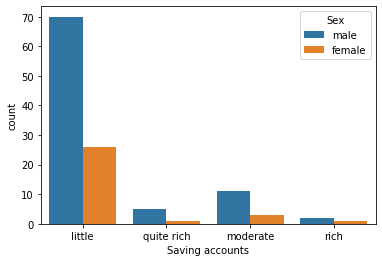

In [39]:
sns.countplot(df[df['Job']=='highlyskill']['Saving accounts'],hue=df['Sex'])

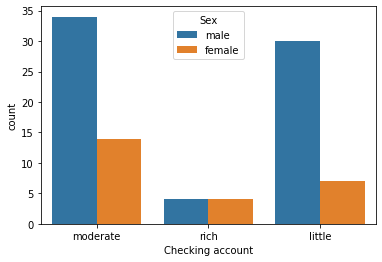

In [40]:
sns.countplot(df[df['Job']=='highlyskill']['Checking account'],hue=df['Sex'])

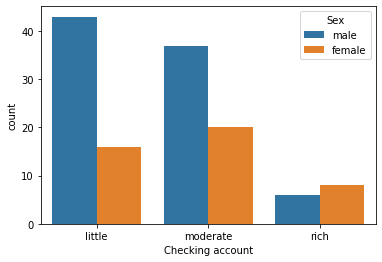

In [41]:
sns.countplot(df[df['Job']=='unskill and res']['Checking account'],hue=df['Sex'])

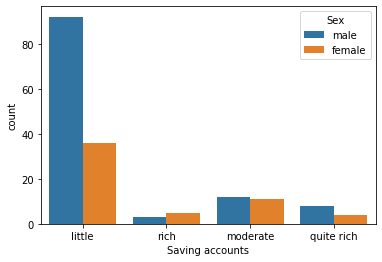

In [42]:
sns.countplot(df[df['Job']=='unskill and res']['Saving accounts'],hue=df['Sex'])

In [43]:
#grouping of age
def age(x):
    if x >=19 and x<=30:
        return 'young'
    elif x>30 and x<=45:
        return 'Mid-Young'
    elif x>45 and x<=60:
        return 'Senior'
    else:
        return 'Aged'
df['Age_cat']=df['Age'].map(lambda x : age(x))    

In [44]:
#sns.barplot(df['Age_cat'],df['Credit amount'],hue=df['Risk'])

In [45]:
#a=np.array([2,3,4,1,6,7,0,9])
#intervals=(2,4)
#pd.cut(a,bins=2,intervals)

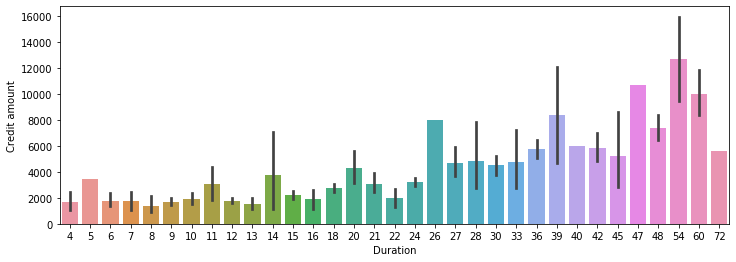

In [46]:
plt.figure(figsize=(12,4))
sns.barplot(df['Duration'],df['Credit amount'])

In [47]:
#for index, row in df.head(2).iterrows():
 #   print(index, row)
    
#for row in df.head(2).itertuples():
 #   print(row)  
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk', 'Age_cat'],
      dtype='object')

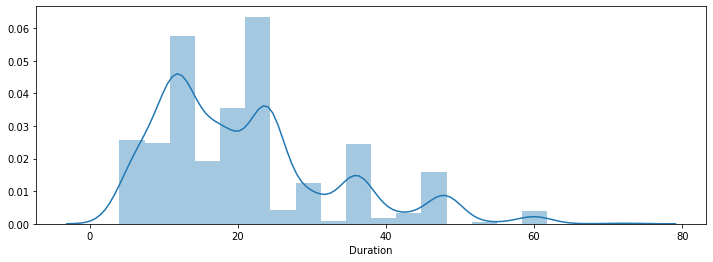

In [48]:
plt.figure(figsize=(12,4))
sns.distplot(df['Duration'],hist=True,bins=20)
#sns.distplot(df['Credit amount'])

##Most of duration are less than 30

In [49]:
df1=df[[ 'Sex', 'Job', 'Housing',
       'Credit amount', 'Duration', 'Purpose', 'Risk', 'Age_cat']]

In [50]:
columns=['Sex', 'Job', 'Housing','Purpose','Age_cat']
for col in columns:
    #dummy=pd.get_dummies(df[col],drop_first=True)
    df1=df1.join(pd.get_dummies(df[col],drop_first=True))

In [51]:
df1.columns

Index(['Sex', 'Job', 'Housing', 'Credit amount', 'Duration', 'Purpose', 'Risk',
       'Age_cat', 'male', 'highlyskill', 'skilled', 'unskill and res', 'own',
       'rent', 'car', 'domestic appliances', 'education',
       'furniture/equipment', 'radio/TV', 'repairs', 'vacation/others',
       'Mid-Young', 'Senior', 'young'],
      dtype='object')

In [52]:
df1.drop(['Sex', 'Job', 'Housing','Purpose','Age_cat'],axis=1,inplace=True)

In [53]:
df1.columns

Index(['Credit amount', 'Duration', 'Risk', 'male', 'highlyskill', 'skilled',
       'unskill and res', 'own', 'rent', 'car', 'domestic appliances',
       'education', 'furniture/equipment', 'radio/TV', 'repairs',
       'vacation/others', 'Mid-Young', 'Senior', 'young'],
      dtype='object')

In [54]:
X=df1[['Credit amount', 'Duration', 'male', 'highlyskill', 'skilled',
       'unskill and res', 'own', 'rent', 'car', 'domestic appliances',
       'education', 'furniture/equipment', 'radio/TV', 'repairs',
       'vacation/others', 'Mid-Young', 'Senior', 'young']]
y=df1['Risk']

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=22)

In [56]:
print(f'X_train size{X_train.shape} X_test{X_test.shape},y_train {y_train.shape},y_test {y_test.shape}')

X_train size(700, 18) X_test(300, 18),y_train (700,),y_test (300,)


In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import  GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, KFold, cross_val_score
pip_lr=Pipeline([('logistic Reg',LogisticRegression())])
pip_dtc=Pipeline([('DTC',DecisionTreeClassifier())])
pip_frc=Pipeline([('RFC',RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=22, verbose=0,
                       warm_start=False))])
for pip in [pip_lr,pip_dtc,pip_frc]:
    scores=cross_val_score(pip,X,y,cv=4)
    print(scores.mean())
    

c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7050000000000001
0.602
0.71


In [58]:
parameters={'n_estimators':[20,30,40,50],'max_depth':np.arange(4,8),\
           'min_samples_leaf':np.arange(2,8)}

In [59]:
model=RandomForestClassifier(criterion='gini',random_state=22)

In [60]:
gs=GridSearchCV(model,param_grid=parameters,n_jobs=-1,\
               verbose=1,cv=4)
gs.fit(X_train,y_train)

Fitting 4 folds for each of 96 candidates, totalling 384 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 384 out of 384 | elapsed:   24.0s finished


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=22,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'ma

In [61]:
print(gs.best_score_)
print(gs.best_estimator_)

0.7
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=22, verbose=0,
                       warm_start=False)


In [64]:
#final model
rfc=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=22, verbose=0,
                       warm_start=False)
rfc.fit(X_train,y_train)
print("accuracy",rfc.score(X_train,y_train))

print("accuracy",rfc.score(X_test,y_test))
print(accuracy_score(y_test,pred))

accuracy 0.7128571428571429
accuracy 0.72
0.72


In [63]:
pred=rfc.predict(X_test)

In [65]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
pip_svc=Pipeline([('std',StandardScaler()),('SVM',SVC(C=2))])

In [66]:
pip_svc.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('std',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('SVM',
                 SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [67]:
pred=pip_svc.predict(X_test)

In [68]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         bad       0.54      0.23      0.33        81
        good       0.77      0.93      0.84       219

    accuracy                           0.74       300
   macro avg       0.65      0.58      0.58       300
weighted avg       0.71      0.74      0.70       300



In [69]:
print(confusion_matrix(y_test,pred))

[[ 19  62]
 [ 16 203]]


In [70]:
print(pip_svc.score(X_train,y_train))
print(pip_svc.score(X_test,y_test))

0.7757142857142857
0.74


In [71]:
Feature_Imp=pd.Series(rfc.feature_importances_,index=['Credit amount', 'Duration', 'male', 'highlyskill', 'skilled',
'unskill and res', 'own', 'rent', 'car', 'domestic appliances',
       'education', 'furniture/equipment', 'radio/TV', 'repairs',
       'vacation/others', 'Mid-Young', 'Senior', 'young'])


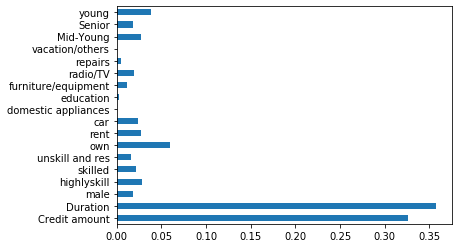

In [72]:
Feature_Imp.plot(kind='barh')

In [73]:
X_train.columns

Index(['Credit amount', 'Duration', 'male', 'highlyskill', 'skilled',
       'unskill and res', 'own', 'rent', 'car', 'domestic appliances',
       'education', 'furniture/equipment', 'radio/TV', 'repairs',
       'vacation/others', 'Mid-Young', 'Senior', 'young'],
      dtype='object')

In [74]:
rfc.score(X_train,y_train)

0.7128571428571429

In [77]:
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(10)

In [93]:
accuracy=[]
for train,test in skf.split(X,y):
    #print(f'train {train} validation{test}')
    x1_train,x1_test=X.iloc[train],X.iloc[test]
    y1_train,y1_test=y.iloc[train],y.iloc[test]
    predskf=rfc.predict(x1_test)
    accu=accuracy_score(y1_test,predskf)
    accuracy.append(accu)
print(accuracy)    

[0.79, 0.7, 0.72, 0.75, 0.73, 0.7, 0.7, 0.75, 0.72, 0.68]


In [88]:
rfc.fit(x1_train,y1_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=22, verbose=0,
                       warm_start=False)

In [95]:
np.array(accuracy).mean()

0.724

In [90]:
accuracy_score(y1_test,predskf)


0.68